In [11]:
import pandas as pd
! pip install pyfixest -q
import pyfixest as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Overview

In [13]:
path_to_data = "https://raw.githubusercontent.com/sshi24/EEMP2024_group_project_EWSS/refs/heads/main/Data/07.11.2024_Data_Python_Project_part-1-oecd-alcohol-consumption-1950-to-2015_fixed.csv"
df = pd.read_csv(path_to_data,index_col=False)

# Overview headers and shape of df
pd.set_option('display.max_columns', None)
df

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK


### Wine Consumption per capita

In [14]:
# Sort average yearly Wine Consumption per capita by country
dfagg_cons = df.groupby('Country').Cons_pc_Wine.mean().reset_index()
dfagg_cons.sort_values('Cons_pc_Wine', ascending=False)

,Country,Cons_pc_Wine
8,France,8.039111
17,Portugal,7.682000
13,Italy,7.395111
5,Croatia,4.943571
21,Switzerland,4.608444
19,Spain,4.575778
1,Austria,4.575778
10,Greece,3.859111
11,Hungary,3.507111
2,Belgium,3.258667


<Axes: xlabel='Cons_pc_Wine', ylabel='Country'>

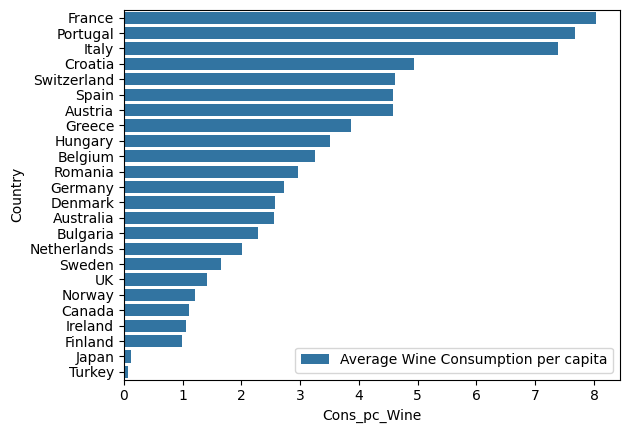

In [16]:
# Plot in a bar chart
sns.barplot(dfagg_cons.sort_values('Cons_pc_Wine', ascending=False), y='Country', x='Cons_pc_Wine', label='Average Wine Consumption per capita') # need to be improved

### Price of Wine in USD

In [17]:
dfagg_p = df[df.Price_USD_Wine.isnull()==False]

# Convert Price_USD_Wine to numeric, forcing non-numeric entries to NaN
dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')

# Group by 'Country' and calculate the mean of 'Price_USD_Wine', then reset index
dfagg_p = dfagg_p.groupby('Country', as_index=False)['Price_USD_Wine'].mean()

# Sort values of 'Price_USD_Wine'
dfagg_p.sort_values('Price_USD_Wine', ascending=False)

<ipython-input-17-548d47ded86f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')


,Country,Price_USD_Wine
16,Norway,145.068222
7,Finland,117.298140
12,Ireland,100.196316
23,UK,99.311556
17,Portugal,86.465789
21,Switzerland,86.038000
2,Belgium,85.036316
1,Austria,84.594444
10,Greece,82.538421
13,Italy,80.181579


<Axes: xlabel='Price_USD_Wine', ylabel='Country'>

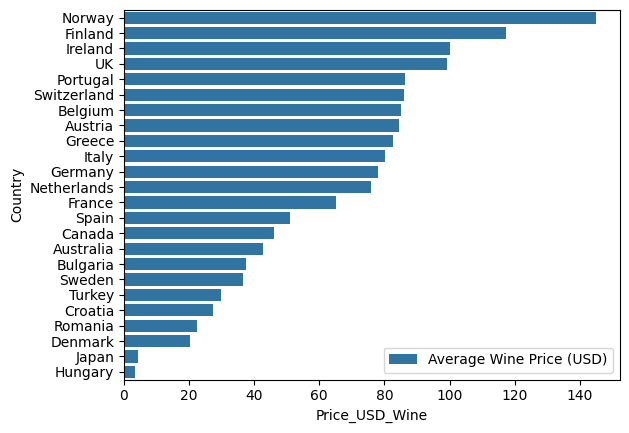

In [18]:
sns.barplot(dfagg_p.sort_values('Price_USD_Wine', ascending=False), y='Country', x='Price_USD_Wine', label='Average Wine Price (USD)')

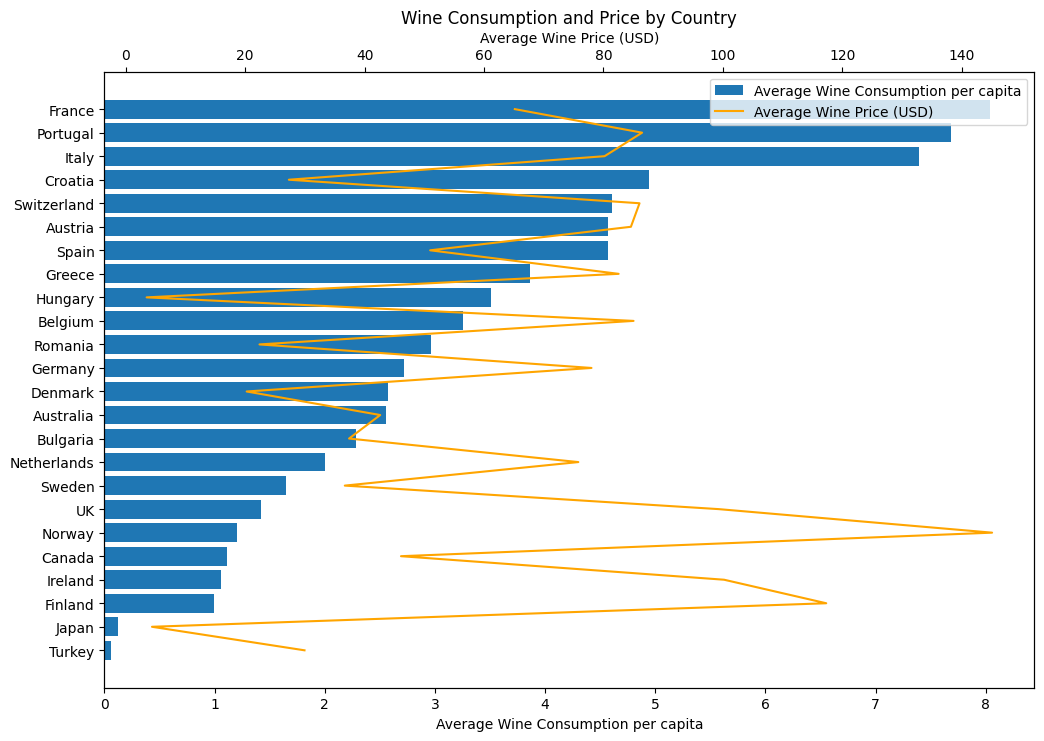

In [19]:
# Sort dfagg_cons by Cons_pc_Wine in descending order
dfagg_cons_sorted = dfagg_cons.sort_values('Cons_pc_Wine', ascending=True)

# Get the order of countries based on Cons_pc_Wine
country_order = dfagg_cons_sorted['Country'].tolist()

# Filter dfagg_p to include only countries present in country_order
dfagg_p_filtered = dfagg_p[dfagg_p['Country'].isin(country_order)]

# Reorder dfagg_p_filtered based on country_order
dfagg_p_ordered = dfagg_p_filtered.set_index('Country').loc[country_order].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Cons_pc_Wine as a bar chart on the left axis
ax1.barh(dfagg_cons_sorted['Country'], dfagg_cons_sorted['Cons_pc_Wine'], label='Average Wine Consumption per capita')
ax1.set_xlabel('Average Wine Consumption per capita')

# Create a secondary y-axis on the right
ax2 = ax1.twiny()

# Plot Price_USD_Wine as a line chart on the right axis, using the same y-axis order as Cons_pc_Wine
ax2.plot(dfagg_p_ordered['Price_USD_Wine'], dfagg_p_ordered['Country'], color='orange', label='Average Wine Price (USD)')
ax2.set_xlabel('Average Wine Price (USD)')

# Set the title of the plot
plt.title('Wine Consumption and Price by Country')

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

### Conditional Budget Share of Wine

<Axes: xlabel='Cond_Bugdget_Shares_Wine', ylabel='Country'>

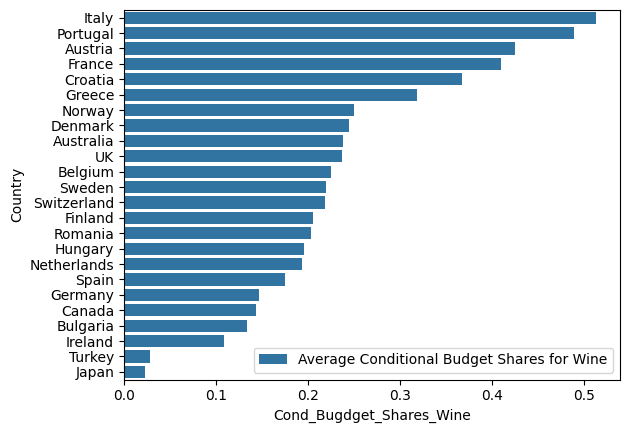

In [21]:
# Group by 'Country' and calculate the mean of 'Cond_Bugdget_Shares_Wine', then reset index
dfagg_cbugdget = df.groupby('Country', as_index=False)['Cond_Bugdget_Shares_Wine'].mean()

# Sort values of 'Cond_Bugdget_Shares_Wine'
dfagg_cbugdget.sort_values('Cond_Bugdget_Shares_Wine', ascending=False)

sns.barplot(dfagg_cbugdget.sort_values('Cond_Bugdget_Shares_Wine', ascending=False), y='Country', x='Cond_Bugdget_Shares_Wine', label='Average Conditional Budget Shares for Wine')

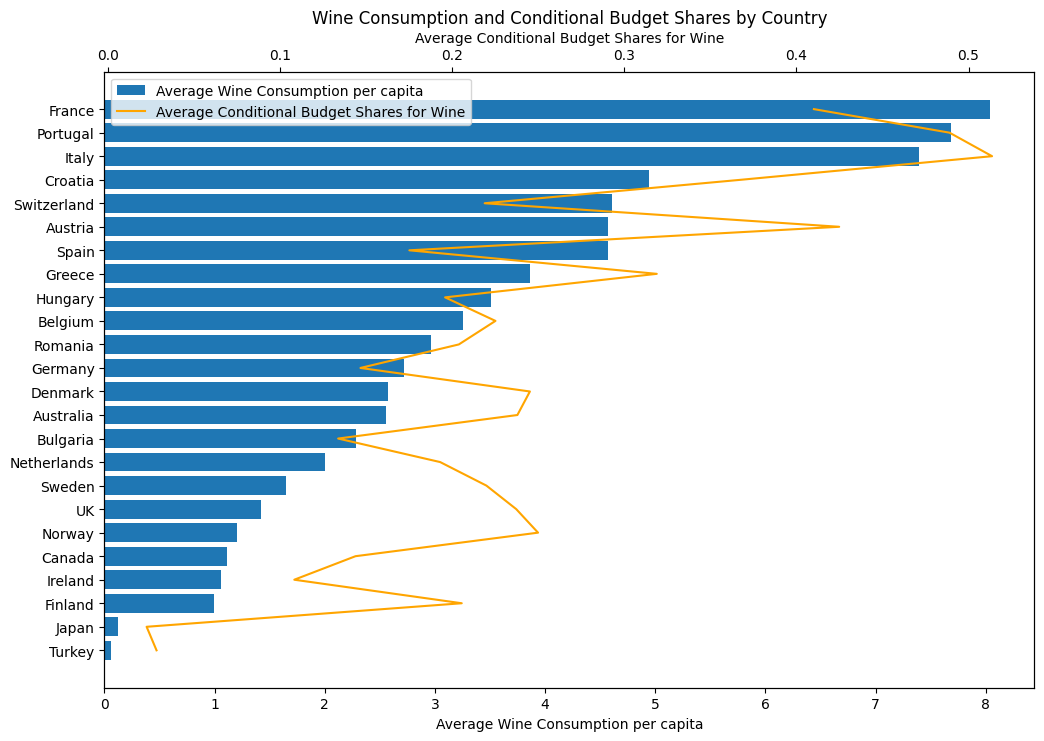

In [22]:
# Sort dfagg_cons by Cons_pc_Wine in descending order
dfagg_cons_sorted = dfagg_cons.sort_values('Cons_pc_Wine', ascending=True)

# Get the order of countries based on Cons_pc_Wine
country_order = dfagg_cons_sorted['Country'].tolist()

# Filter dfagg_p to include only countries present in country_order
dfagg_cbugdget_filtered = dfagg_cbugdget[dfagg_cbugdget['Country'].isin(country_order)]

# Reorder dfagg_p_filtered based on country_order
dfagg_cbugdget_ordered = dfagg_cbugdget_filtered.set_index('Country').loc[country_order].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Cons_pc_Wine as a bar chart on the left axis
ax1.barh(dfagg_cons_sorted['Country'], dfagg_cons_sorted['Cons_pc_Wine'], label='Average Wine Consumption per capita')
ax1.set_xlabel('Average Wine Consumption per capita')

# Create a secondary y-axis on the right
ax2 = ax1.twiny()

# Plot Price_USD_Wine as a line chart on the right axis, using the same y-axis order as Cons_pc_Wine
ax2.plot(dfagg_cbugdget_ordered['Cond_Bugdget_Shares_Wine'], dfagg_cbugdget_ordered['Country'], color='orange', label='Average Conditional Budget Shares for Wine')
ax2.set_xlabel('Average Conditional Budget Shares for Wine')

# Set the title of the plot
plt.title('Wine Consumption and Conditional Budget Shares by Country')

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

# Regression

In [24]:
print(type(df['Cons_pc_Wine']))

# Convert data in df, except columns of Year and Country, to numeric, handling errors by coercing to NaN
for col in df.columns:
  if col not in ['Year', 'Country']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df

<class 'pandas.core.series.Series'>


,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK


In [25]:
reg1 = pf.feols('Cons_pc_Wine ~ Price_USD_Wine', data=df)
pf.etable(reg1) # not sig.

GT(_tbl_data=  level_0         level_1                      0
0    coef  Price_USD_Wine     0.001 <br> (0.002)
1    coef       Intercept  2.647*** <br> (0.143)
2   stats    Observations                    661
3   stats       S.E. type                    iid
4   stats   R<sup>2</sup>                  0.000, _body=<great_tables._gt_data.Body object at 0x7c1b596b9750>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c1b4f2e0e20>, _spanners=Spanners([SpannerInfo(spanner_id='Cons_pc_Wine', spanner_level=1, spanner_label='Cons_pc_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7c1b4f2e0d60>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, categ

Interpretation:


In [30]:
# Multilinearity?? budget and consumption
  # check correlation between Cons_pc_Wine and Cond_Budget_Shares_Wine
df.Cons_pc_Wine.corr(df.Cond_Bugdget_Shares_Wine)

0.783477405995297

In [ ]:
reg2 = pf.feols('Cons_pc_Wine ~ Cond_Bugdget_Shares_Wine', data=df)
pf.etable(reg2)

GT(_tbl_data=  level_0                   level_1                       0
0    coef  Cond_Bugdget_Shares_Wine  12.448*** <br> (0.384)
1    coef                 Intercept    -0.257* <br> (0.106)
2   stats              Observations                     662
3   stats                 S.E. type                     iid
4   stats             R<sup>2</sup>                   0.614, _body=<great_tables._gt_data.Body object at 0x7a7309e575e0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7a7309f04370>, _spanners=Spanners([SpannerInfo(spanner_id='Cons_pc_Wine', spanner_level=1, spanner_label='Cons_pc_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7a7309fe1030>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', 

In [ ]:
reg2_2 = pf.feols('Cons_pc_Wine ~ Cond_Bugdget_Shares_Wine + Price_USD_Wine', data=df)
pf.etable(reg2_2)

GT(_tbl_data=  level_0                   level_1                       0
0    coef  Cond_Bugdget_Shares_Wine  14.325*** <br> (0.366)
1    coef            Price_USD_Wine  -0.014*** <br> (0.001)
2    coef                 Intercept     0.224* <br> (0.100)
3   stats              Observations                     661
4   stats                 S.E. type                     iid
5   stats             R<sup>2</sup>                   0.700, _body=<great_tables._gt_data.Body object at 0x7a73106b6800>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7a730a0baa40>, _spanners=Spanners([SpannerInfo(spanner_id='Cons_pc_Wine', spanner_level=1, spanner_label='Cons_pc_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7a730a0baf20>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_lef

In [ ]:
# create dummy variable for region